In [1]:
from nltk.tree import ParentedTree
from rstviewer import embed_rs3_image

In [2]:
# def t(root, children=None):
#     "Create nltk.tree.ParentedTree from a root (str) and a list of (str, list) tuples."
#     assert isinstance(root, basestring)

#     if isinstance(children, list):
#         child_trees = [t(child, grandchildren)
#                        for (child, grandchildren) in children]
#     elif isinstance(children, basestring):
#         # this tree does only have one child, a leaf node
#         child_trees = [ParentedTree(children, [])]
#     else:  #children == None
#         # this tree only consists of one leaf node
#         child_trees = []
#     return ParentedTree(root, child_trees)

def t(root, children=None):
    "Create nltk.tree.ParentedTree from a root (str) and a list of (str, list) tuples."
    assert isinstance(root, basestring)

    if isinstance(children, list):
        child_trees = [t(child, grandchildren)
                       for (child, grandchildren) in children]
    elif isinstance(children, basestring):
        # this tree does only have one child, a leaf node
        child_trees = [children]
    else:  #children == None
        # this tree only consists of one leaf node
        child_trees = []
    return ParentedTree(root, child_trees)

In [3]:
t("foo")

In [4]:
t("foo", [])

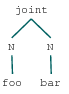

In [5]:
t("joint", [("N", "foo"), ("N", "bar")])

In [6]:
!ls *.rs3

eins-zwei-drei-(circ-(circ-eins-from-zwei)-from-drei).rs3
eins-zwei-drei-(circ-(circ-eins-from-zwei)-to-drei).rs3
eins-zwei-drei-(circ-(circ-eins-to-zwei)-from-drei).rs3
eins-zwei-drei-(circ-(circ-eins-to-zwei)-to-drei.rs3
eins-zwei-drei-(circ-eins-from-(joint-zwei-and-drei).rs3
eins-zwei-drei-(circ-eins-to-(joint-zwei-and-drei).rs3
eins-zwei-drei-(circ-(joint-eins-and-zwei)-from-drei).rs3
eins-zwei-drei-(circ-(joint-eins-and-zwei)-to-drei).rs3
eins-zwei-drei-(elab-eins-from-(joint-zwei-and-drei).rs3
eins-zwei-drei-(joint-eins-and-zwei-and-drei).rs3
eins-zwei-drei-only-segments.rs3
foo-bar-circ-bar-to-foo.rs3
foo-bar-circ-foo-to-bar.rs3
foo-bar-elab-bar-to-foo.rs3
foo-bar-elab-foo-to-bar.rs3
foo-bar-foo-conj-bar.rs3
foo-bar-foo-joint-bar.rs3
foo-bar-only-segments.rs3


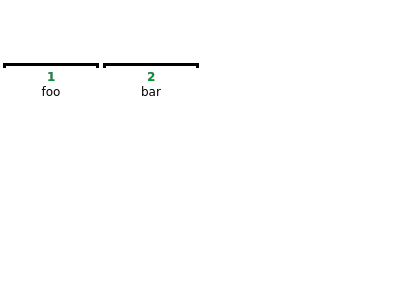

In [7]:
embed_rs3_image("foo-bar-only-segments.rs3")

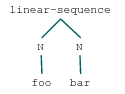

In [8]:
# as the leaves are unconnected, we need to add a root node and edges
# maybe we should always connect unconnected nodes into a linear-sequence multinuc
t("linear-sequence", [
    ("N", "foo"),
    ("N", "bar")])

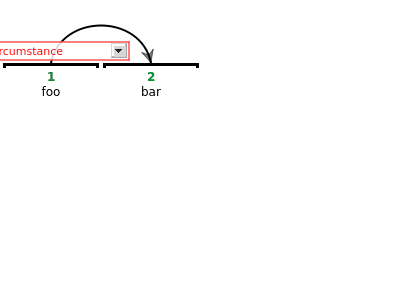

In [9]:
embed_rs3_image("foo-bar-circ-foo-to-bar.rs3")

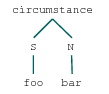

In [10]:
t("circumstance", [
    ("S", "foo"),
    ("N", "bar")])

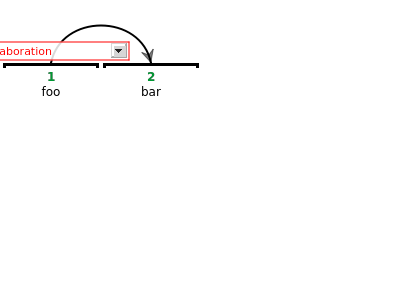

In [11]:
embed_rs3_image("foo-bar-elab-foo-to-bar.rs3")

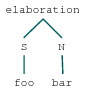

In [12]:
t("elaboration", [
    ("S", "foo"),
    ("N", "bar")])

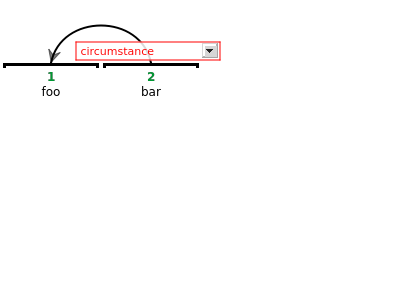

In [13]:
embed_rs3_image("foo-bar-circ-bar-to-foo.rs3")

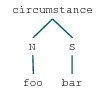

In [14]:
t("circumstance", [
    ("N", "foo"),
    ("S", "bar")])

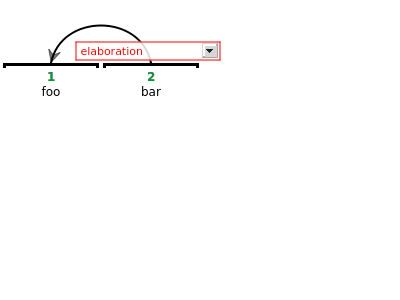

In [15]:
embed_rs3_image("foo-bar-elab-bar-to-foo.rs3")

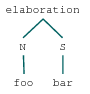

In [16]:
t("elaboration", [
    ("N", "foo"),
    ("S", "bar")])

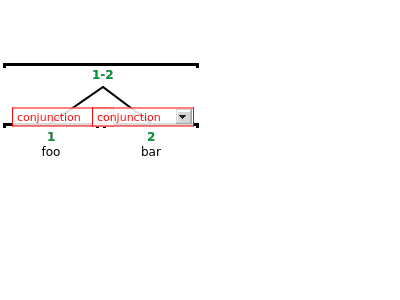

In [17]:
embed_rs3_image("foo-bar-foo-conj-bar.rs3")

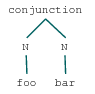

In [18]:
t("conjunction", [
    ("N", "foo"),
    ("N", "bar")])

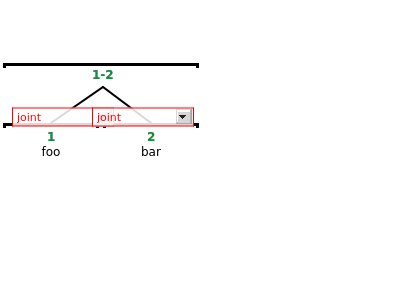

In [19]:
embed_rs3_image("foo-bar-foo-joint-bar.rs3")

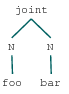

In [20]:
t("joint", [
    ("N", "foo"),
    ("N", "bar")])

In [21]:
trees_with_three_elems = !ls eins*.rs3
for rs3_file in trees_with_three_elems:
    print "embed_rs3_image('{}')".format(rs3_file)

embed_rs3_image('eins-zwei-drei-(circ-(circ-eins-from-zwei)-from-drei).rs3')
embed_rs3_image('eins-zwei-drei-(circ-(circ-eins-from-zwei)-to-drei).rs3')
embed_rs3_image('eins-zwei-drei-(circ-(circ-eins-to-zwei)-from-drei).rs3')
embed_rs3_image('eins-zwei-drei-(circ-(circ-eins-to-zwei)-to-drei.rs3')
embed_rs3_image('eins-zwei-drei-(circ-eins-from-(joint-zwei-and-drei).rs3')
embed_rs3_image('eins-zwei-drei-(circ-eins-to-(joint-zwei-and-drei).rs3')
embed_rs3_image('eins-zwei-drei-(circ-(joint-eins-and-zwei)-from-drei).rs3')
embed_rs3_image('eins-zwei-drei-(circ-(joint-eins-and-zwei)-to-drei).rs3')
embed_rs3_image('eins-zwei-drei-(elab-eins-from-(joint-zwei-and-drei).rs3')
embed_rs3_image('eins-zwei-drei-(joint-eins-and-zwei-and-drei).rs3')
embed_rs3_image('eins-zwei-drei-only-segments.rs3')


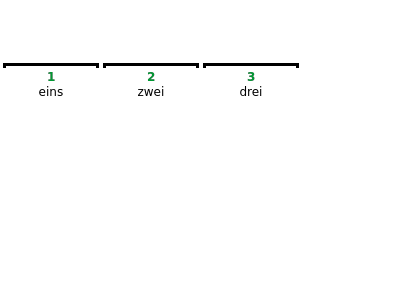

In [22]:
embed_rs3_image('eins-zwei-drei-only-segments.rs3')

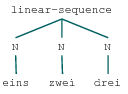

In [23]:
# as the leaves are unconnected, we need to add a root node and edges
# maybe we should always connect unconnected nodes into a linear-sequence multinuc
t("linear-sequence", [("N", "eins"), ("N", "zwei"), ("N", "drei")])

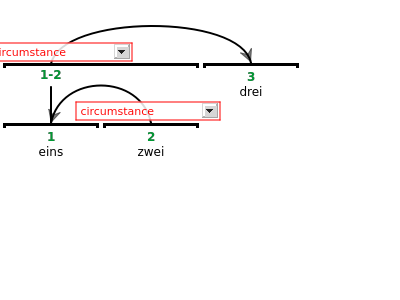

In [24]:
embed_rs3_image('eins-zwei-drei-(circ-(circ-eins-from-zwei)-to-drei).rs3')

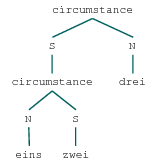

In [25]:
t("circumstance", [
    ("S", [
        ("circumstance", [
            ("N", "eins"),
            ("S", "zwei")])]),
    ("N", "drei")])

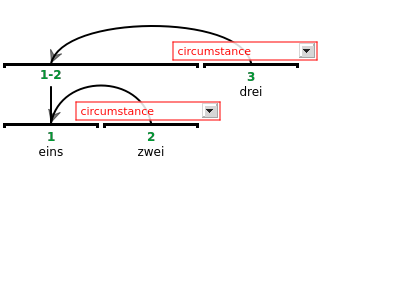

In [26]:
embed_rs3_image('eins-zwei-drei-(circ-(circ-eins-from-zwei)-from-drei).rs3')

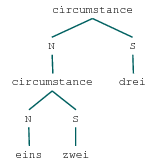

In [27]:
t("circumstance", [
    ("N", [
        ("circumstance", [
            ("N", "eins"),
            ("S", "zwei")])]),
    ("S", "drei")])

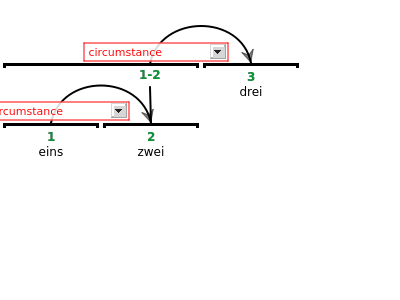

In [28]:
embed_rs3_image('eins-zwei-drei-(circ-(circ-eins-to-zwei)-to-drei.rs3')

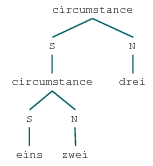

In [29]:
t("circumstance", [
    ("S", [
        ("circumstance", [
            ("S", "eins"),
            ("N", "zwei")])]),
    ("N", "drei")])

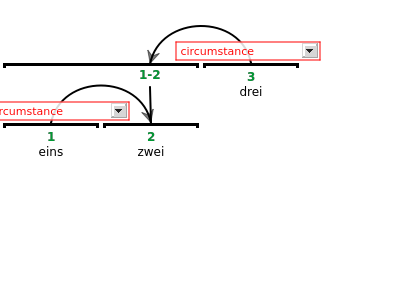

In [30]:
embed_rs3_image('eins-zwei-drei-(circ-(circ-eins-to-zwei)-from-drei).rs3')

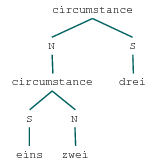

In [31]:
t("circumstance", [
    ("N", [
        ("circumstance", [
            ("S", "eins"),
            ("N", "zwei")])]),
    ("S", "drei")])

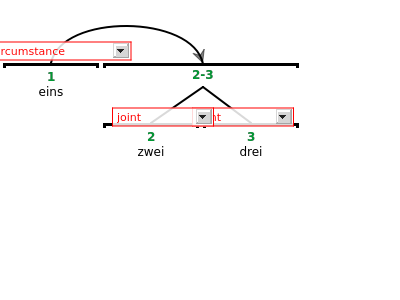

In [32]:
embed_rs3_image('eins-zwei-drei-(circ-eins-to-(joint-zwei-and-drei).rs3')

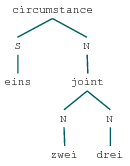

In [33]:
t("circumstance", [
    ("S", "eins"),
    ("N", [
        ("joint", [
            ("N", "zwei"),
            ("N", "drei")])])])

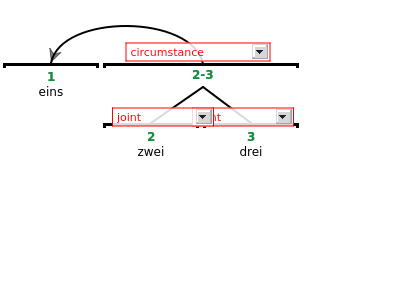

In [34]:
embed_rs3_image('eins-zwei-drei-(circ-eins-from-(joint-zwei-and-drei).rs3')

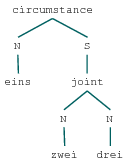

In [35]:
t("circumstance", [
    ("N", "eins"),
    ("S", [
        ("joint", [
            ("N", "zwei"),
            ("N", "drei")])])])

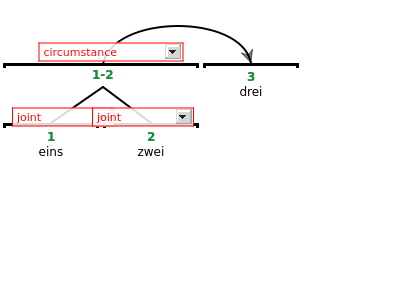

In [36]:
embed_rs3_image('eins-zwei-drei-(circ-(joint-eins-and-zwei)-to-drei).rs3')

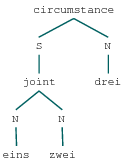

In [37]:
t("circumstance", [
    ("S", [
        ("joint", [
            ("N", "eins"),
            ("N", "zwei")
        ])
    ]),
    ("N", "drei")
])

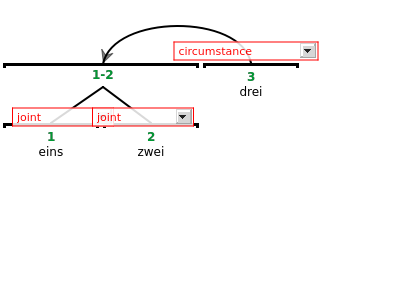

In [38]:
embed_rs3_image('eins-zwei-drei-(circ-(joint-eins-and-zwei)-from-drei).rs3')

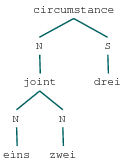

In [39]:
t("circumstance", [
    ("N", [
        ("joint", [
            ("N", "eins"),
            ("N", "zwei")
        ])
    ]),
    ("S", "drei")
])

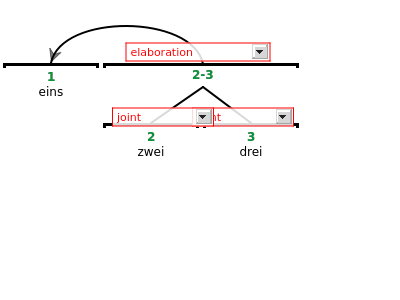

In [40]:
embed_rs3_image('eins-zwei-drei-(elab-eins-from-(joint-zwei-and-drei).rs3')

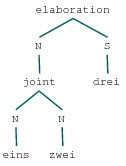

In [41]:
t("elaboration", [
    ("N", [
        ("joint", [
            ("N", "eins"),
            ("N", "zwei")
        ])
    ]),
    ("S", "drei")
])

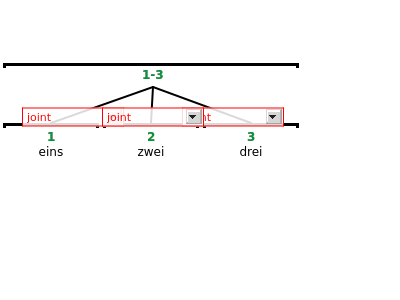

In [42]:
embed_rs3_image('eins-zwei-drei-(joint-eins-and-zwei-and-drei).rs3')

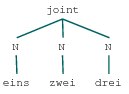

In [43]:
t("joint", [("N", "eins"), ("N", "zwei"), ("N", "drei")])

In [48]:
example_tree = t("elaboration", [
    ("N", [
        ("joint", [
            ("N", "eins"),
            ("N", "zwei")
        ])
    ]),
    ("S", "drei")
])

In [49]:
example_tree.leaves()

['eins', 'zwei', 'drei']

In [55]:
example_tree.pretty_print()

           elaboration     
        ________|_______    
       N                |  
       |                |   
     joint              |  
  _____|________        |   
 N              N       S  
 |              |       |   
eins           zwei    drei

